**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [ ]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [ ]:
print(type(train_images))
print(train_images.shape)
print(train_images[251].shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
(28, 28)


# process the data
# convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [ ]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
print(train_data.shape)

784
(60000, 784)


# convert data to float and scale values between 0 and 1

In [ ]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

# scale data

In [ ]:
train_data /=255.0
test_data /=255.0

# change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [ ]:
train_labels_one_hot = to_categorical(train_labels)

test_labels_one_hot = to_categorical(test_labels)

In [ ]:
print(train_labels_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# creating network

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_55 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_56 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Compile model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model

In [ ]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=0)

In [ ]:
[test_loss, test_acc] = model2.evaluate(test_data, test_labels_one_hot)
print("Existing model Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1537 - accuracy: 0.9749
Existing model Evaluation result on Test Data : Loss = 0.15368682146072388, accuracy = 0.9749000072479248


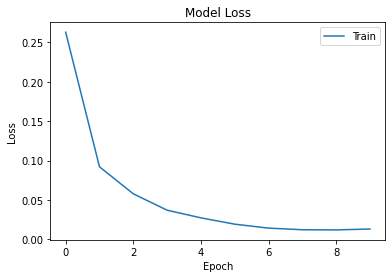

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

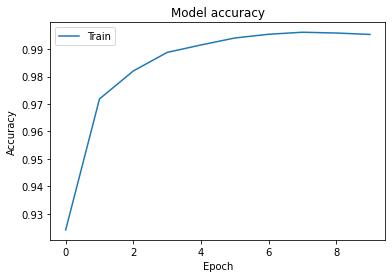

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

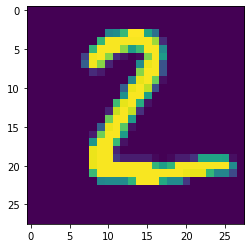

In [ ]:
# plt.imshow(test_data[0].reshape([28,28])) # test_images.reshape(test_images.shape[0],dimData)
plt.imshow(test_images[1])

In [ ]:
res = model.predict(test_data[1:2])

In [ ]:
# print(res)
print(res.argmax()) # Returns the indices of the maximum values along an axis.

2


## We had used 2 hidden layers and relu activation
# 1. Change the number of hidden layers and the activation to tanh or sigmoid and report what happens.

In [ ]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(dimData,)))
model2.add(Dense(512, activation='relu'))

# Adding hidden layers with different activation function
model2.add(Dense(450, activation='tanh'))
model2.add(Dense(650, activation='tanh'))

model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_59 (Dense)             (None, 450)               230850    
_________________________________________________________________
dense_60 (Dense)             (None, 650)               293150    
_________________________________________________________________
dense_61 (Dense)             (None, 10)                6510      
Total params: 1,195,086
Trainable params: 1,195,086
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model2.fit(train_data, train_labels_one_hot, 
                     validation_data=(test_data, test_labels_one_hot), 
                     batch_size=256, epochs=20, verbose=0)

## Model accuracy after adding hidden layers with different activation functions.

In [ ]:
[test_loss, test_acc] = model2.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data with added hidden layers with different activation function : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.1368 - accuracy: 0.9788
Evaluation result on Test Data with added hidden layers with different activation function : Loss = 0.13680972158908844, accuracy = 0.9787999987602234


## We see that there is an **slight increase** in the accuracy after adding hidden layers.

#2. Using the history object in the source code, plot the loss and accuracy for both training data and validation data.

## Model Accuracy

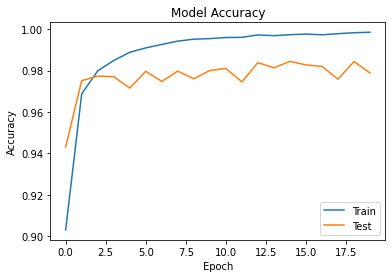

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Model Loss

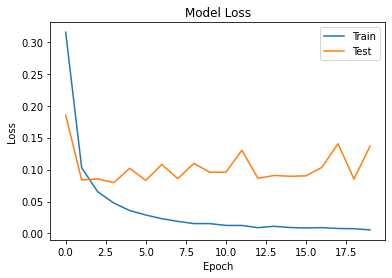

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 3. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image in the test data.

[[3.4511171e-08 5.5249341e-08 9.7293105e-07 1.2604666e-07 9.9998772e-01
  1.0615539e-07 3.8313559e-08 1.5972914e-06 4.3970320e-07 8.8305887e-06]]
[4]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


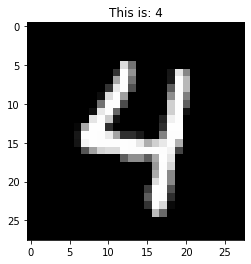

In [ ]:
# Loading and predicting the image using the test data
pred = model2.predict(test_data[[27], :], batch_size=1)
print(pred)

# print the class of prediction
pred_class = model2.predict_classes(test_data[[27], :])
print(pred_class)

# plot image and its prediction by model
plt.imshow(test_images[27].reshape((28, 28)), cmap='gray')
plt.title("This is: " + str(pred_class[0]))
plt.show()

# 4. Convert the sequential model to API model

In [ ]:
from keras.layers import Input, Reshape, Concatenate
from keras.layers import Dense, Flatten
from keras.models import Model

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

X_valid, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

input_ = Input(shape=[28, 28])
flatten = Flatten(input_shape=[28, 28])(input_)
hidden1 = Dense(2**14, activation="relu")(flatten)
hidden2 = Dense(512, activation='relu')(hidden1)
hidden3 = Dense(28*28, activation='relu')(hidden2)
reshap = Reshape((28, 28))(hidden3)
concat_ = Concatenate()([input_, reshap])
flatten2 = Flatten(input_shape=[28, 28])(concat_)
output = Dense(10, activation='softmax')(flatten2)
model_func = Model(inputs=[input_], outputs=[output] )

In [ ]:
model_func.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",
              metrics=["accuracy"])
h = model_func.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9577 - accuracy: 0.7684 - val_loss: 0.2873 - val_accuracy: 0.9208
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2886 - accuracy: 0.9181 - val_loss: 0.2167 - val_accuracy: 0.9414
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2172 - accuracy: 0.9372 - val_loss: 0.1783 - val_accuracy: 0.9526
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1692 - accuracy: 0.9518 - val_loss: 0.1465 - val_accuracy: 0.9602
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1395 - accuracy: 0.9611 - val_loss: 0.1224 - val_accuracy: 0.9666
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1115 - accuracy: 0.9687 - val_loss: 0.1125 - val_accuracy: 0.9704
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0932 - accuracy: 0.9739 - val_loss: 0.0966 - val_accuracy:

In [ ]:
model_func.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_11 (Flatten)            (None, 784)          0           input_7[0][0]                    
__________________________________________________________________________________________________
dense_62 (Dense)                (None, 16384)        12861440    flatten_11[0][0]                 
__________________________________________________________________________________________________
dense_63 (Dense)                (None, 512)          8389120     dense_62[0][0]                   
____________________________________________________________________________________________

## API Model Accuracy

In [ ]:
[test_loss, test_acc] = model_func.evaluate(X_valid, y_valid)
print("API Model Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

157/157 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9784
API Model Evaluation result on Test Data : Loss = 0.07809698581695557, accuracy = 0.9783999919891357


## We see that **accuracy of the API Model has increased compared to Sequential model.**

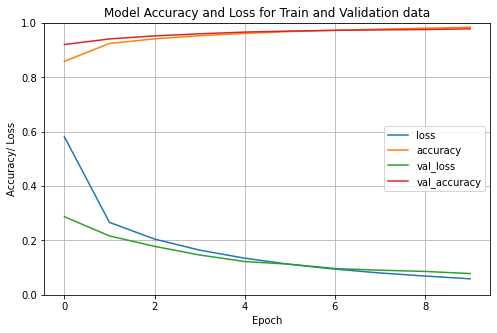

In [ ]:
import pandas as pd

pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model Accuracy and Loss for Train and Validation data')
plt.ylabel('Accuracy/ Loss')
plt.xlabel('Epoch')
plt.gca().set_ylim(0, 1) 
plt.show()

# 5. Run the same code without scaling the images and check for accuracy changes

In [ ]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

train_data = train_data.astype('float')
test_data = test_data.astype('float')

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(dimData,)))
model3.add(Dense(512, activation='relu'))

# Adding hidden layers with different activation function
model3.add(Dense(450, activation='tanh'))
model3.add(Dense(650, activation='tanh'))

model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

784


In [ ]:
history = model3.fit(train_data, train_labels_one_hot, 
                     validation_data=(test_data, test_labels_one_hot), 
                     batch_size=256, epochs=20, verbose=0)

## Model Accuracy without scaling data

In [ ]:
[test_loss, test_acc] = model3.evaluate(test_data, test_labels_one_hot)
print("Model Evaluation result on Test Data without scaling the images : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.2967 - accuracy: 0.9081
Model Evaluation result on Test Data without scaling the images : Loss = 0.2966786026954651, accuracy = 0.9081000089645386


## From the above we see that **accuracy decreases if we train the model without scaling the data.**